# Perceptron in Numpy for Linear Regression

In this notebook, we will use a perceptron to perform a well-known linear regression task without using any specific Machine Learning library, i.e., using only *Numpy*.

In [ ]:
# Importing the necessary libraries
import numpy as np  
import matplotlib.pyplot as plt  

## Generating the data

To generate the data, take the line $y = Ax + B = 0.5x$, where we take the data $x \in \{0, 0.25, 0.5, 0.75, 1\}$.

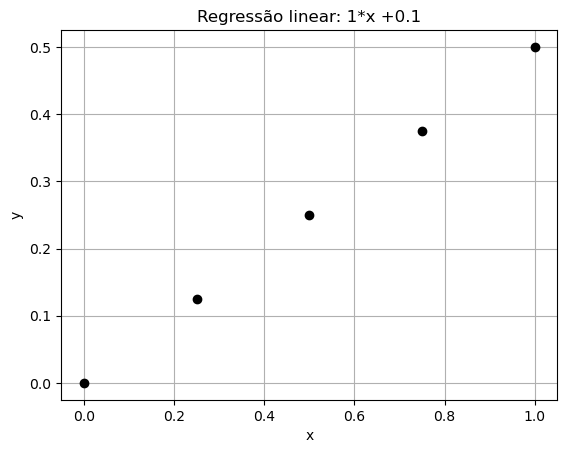

In [ ]:
x = np.linspace(0,1,5)    # input
y = 0.5*x # target

plt.rcParams.update({'font.size': 14})  # Increase font size

plt.title("Linear Regression: 0.5*x +")
plt.plot(x,y,"ko")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Perceptron Initialization
Let's randomly generate the initial weights and bias for our perceptron.

In [ ]:
# To always generate the same random numbers
np.random.seed(42)

w = np.random.randn(1) 
b    = np.random.randn(1)
print(" Valores do pesos:",w,"\n Valores do bias:",b)

 Valores do pesos: [0.49671415] 
 Valores do bias: [-0.1382643]


Defining the activation function
* Here we will only use the `ReLU` and `dReLU` functions as non-linear activation functions, defined below.

In [263]:
def Relu(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

Let's visualize the output of the neural network with randomly initialized weights. We define the perceptron error, i.e., our cost function, as $||y_t - y_0||^2$, where $y_t$ is our target $y$ and $y_0$ is our generated $y$ for each $x$.

In [ ]:
y_0 = [np.array(Relu(np.dot(w,i) + b ))  for i in x ]
y_0 = np.array(y_0).reshape(len(y))
print(" Perceptron error:", np.sum((y_0 - y)**2))

 Erro do perceptron: 0.07504003913718715


Visualization

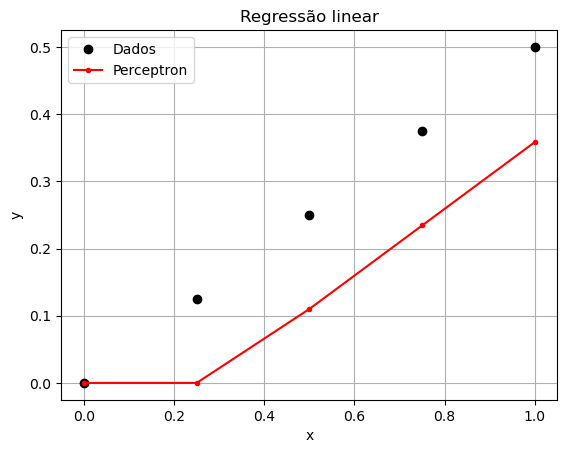

In [ ]:
plt.title("Linear Regression")
plt.plot(x, y, "ko", label="Data")
plt.plot(x, y_0, "r.-", label="Perceptron")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Veja os valores encontrados para $w,b$

In [266]:
w,b

(array([0.49671415]), array([-0.1382643]))

Agora os valores do produto interno $w\cdot x_i$, para cada $i$

In [267]:
w*x

array([0.        , 0.12417854, 0.24835708, 0.37253561, 0.49671415])

Adicionados ao valor de $b$, estes são os argumentos da função de ativação do perceptron.

In [268]:
w*x + b

array([-0.1382643 , -0.01408576,  0.11009278,  0.23427131,  0.35844985])

Assim, $f(w*x + b)$, assume os valores

In [269]:
Relu(w*x + b)

array([-0.        , -0.        ,  0.11009278,  0.23427131,  0.35844985])

Lembre que a função ReLU é zero sempre que $w*x + b\leq0$.

A diferença com os valores de treino são

In [270]:
y - Relu(w*x + b)

array([0.        , 0.125     , 0.13990722, 0.14072869, 0.14155015])

Assim, se para o dado $x^{(i)}$ temos a saida $y_0^{(i)}$, a função custo, $\mathcal{L}(y^{(i)},y_0^{(i)}) = ||y^{(i)}-y_0^{(i)}||^2$, assume os valores

In [271]:
(y - Relu(w*x + b))**2

array([0.        , 0.015625  , 0.01957403, 0.01980456, 0.02003644])

Somando-os sobre o data-set
$$\mathcal{L}(y,y_0) = \sum_i\mathcal{L}(y^{(i)},y_{0}^{(i)}) =\sum_i||y^{(i)}-y_0^{(i)}||^2$$

In [272]:
loss_value = np.sum(y - Relu(w*x + b))**2

print("Erro do perceptron sem treino: ", loss_value)

Erro do perceptron sem treino:  0.299412583424719


## Treinando o Perceptron

Agora vamos atualizar os pesos e bias de acordo com a regra 
$$w_{n+1} = w_n + 2*\eta*\mathcal{L}*f'*x_i$$
$$b_{n+1} = b_n + 2*\eta*\mathcal{L}*f'$$

Onde $f'$ neste caso é a derivada da `ReLU`, que aqui assume valor: $0$, se $w*x+b\leq0$, e $1$ c.c.

In [273]:
#Para sempre gerar os mesmo numeros aleatorios

print(" Peso inicial:",w,"Bias inicial:",b)
eta = 0.05
Loss = 0

w_new = 0
b_new = 0
for indice in range(len(x)):
    x_j = x[indice]  # Input
    y_j = y[indice]  # Target

    linear  = np.dot(w,x_j) + b 
    y_saida = Relu(linear)  # Perceptron
    loss    = y_j - y_saida

    w_new  +=  2*eta*loss*dReLU(linear)*x_j
    b_new  +=  2*eta*loss*dReLU(linear)
    Loss += loss**2
w += w_new
b += b_new
print(" Novo peso :",w,"novo bias:",b)
print("\n Erro do perceptron:",Loss[-1])

 Peso inicial: [0.49671415] Bias inicial: [-0.1382643]
 Novo peso : [0.52841918] novo bias: [-0.0960457]

 Erro do perceptron: 0.07504003913718715


Note que o erro agora é menor devido a atualização dos pesos.

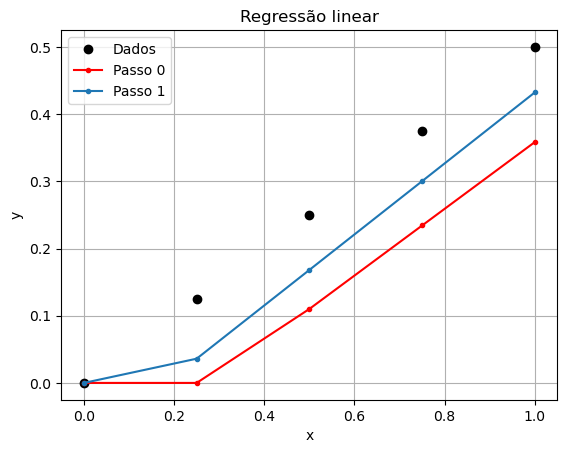

In [274]:
y_1 = []
for i in x:
    y_1.append( Relu(np.dot(w,i) + b ))
    
plt.title("Regressão linear")
plt.plot(x,y,"ko",label="Dados")
plt.plot(x,y_0,"r.-",label="Passo 0")
plt.plot(x,y_1,".-",label="Passo 1")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Vamos repetir o processo de treinamento  por mais alguns passos

 Peso inicial: [0.52841918] Bias inicial: [-0.0960457]
 Novo peso : [0.54192949] novo bias: [-0.07091598]

 Erro do perceptron: [0.01733063]


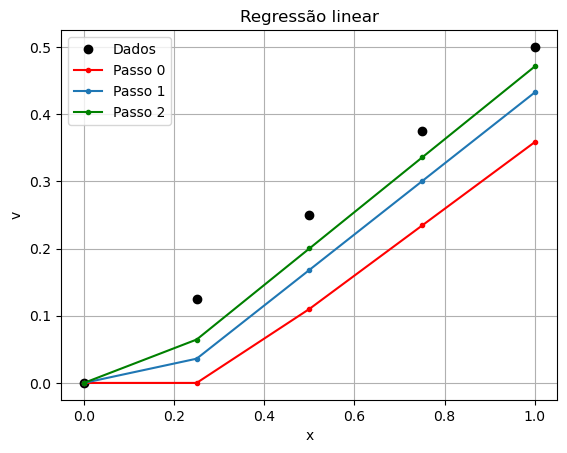

In [275]:
print(" Peso inicial:",w,"Bias inicial:",b)
eta = 0.05
Loss = 0
for indice in range(len(x)):
    x_j = x[indice]  # Input
    y_j = y[indice]  # Target

    linear  = np.dot(w,x_j) + b 
    y_saida = Relu(linear)  # Perceptron
    loss    = y_j - y_saida

    w   +=  2*eta*loss*dReLU(linear)*x_j
    b   +=  2*eta*loss*dReLU(linear)
    
    Loss += loss**2#/len(x)
print(" Novo peso :",w,"novo bias:",b)
print("\n Erro do perceptron:",Loss)

y_2 = []
for i in x:
    y_2.append( Relu(np.dot(w,i) + b ))
    
plt.title("Regressão linear")
plt.plot(x,y,"ko",label="Dados")

plt.plot(x,y_0,"r.-" ,label="Passo 0")
plt.plot(x,y_1,".-",label="Passo 1")
plt.plot(x,y_2,"g.-",label="Passo 2")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("v")
plt.legend()
plt.show()

Vamos repetir 100 vezes 

 Peso inicial: [0.54192949] Bias inicial: [-0.07091598]
 Novo peso : [0.50554908] novo bias: [-0.00396825]

 Erro do perceptron: 1.2154198713965942e-05


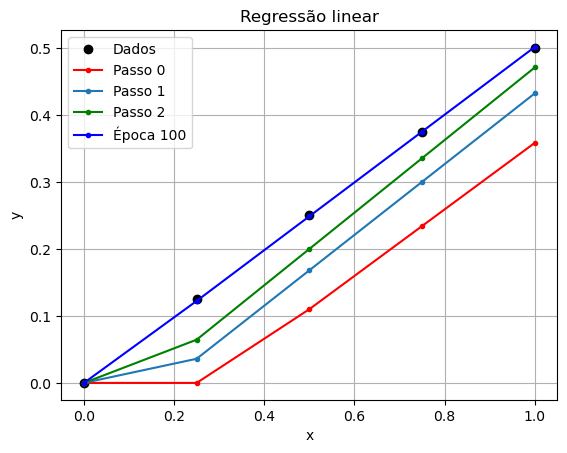

In [276]:
print(" Peso inicial:",w,"Bias inicial:",b)
epochs = 100
eta = 0.05
Loss = np.zeros(epochs)
for j in range(0,epochs):
    for indice in range(len(x)):
        x_j = x[indice]  # Input
        y_j = y[indice]  # Target

        linear  = np.dot(w,x_j) + b 
        y_saida = Relu(linear)  # Perceptron
        loss    = y_j - y_saida

        w   +=  2*eta*loss*dReLU(linear)*x_j
        b   +=  2*eta*loss*dReLU(linear)
        
        Loss[j] += loss**2#/len(x)

    y_saidan = []
    for i in x:
        y_saidan.append( Relu(np.dot(w,i) + b ))

print(" Novo peso :",w,"novo bias:",b)
print("\n Erro do perceptron:",Loss[-1])    

plt.title("Regressão linear")
plt.plot(x,y,"ko",label="Dados")
plt.plot(x,y_0,"r.-" ,label="Passo 0")
plt.plot(x,y_1,".-",label="Passo 1")
plt.plot(x,y_2,"g.-",label="Passo 2")


plt.plot(x,y_saidan,"b.-",label="Época 100")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()